# Vietnamese Inverse Text Normalization - asignment description

Inverse text normalization (ITN) is the task that transforms spoken to written styles. It is particularly useful in automatic speech recognition (ASR) systems where proper names are often miss-recognized by their pronunciations instead of the written forms. By applying ITN, we can improve the readability of the ASR system’s output significantly. This dataset provides data for doing ITN task in the Vietnamese language.

For example:

| Spoken (src)                                           | Written (tgt)      | Types                      |
|--------------------------------------------------|--------------|----------------------------|
| tám giờ chín phút ngày ba tháng tư năm hai nghìn | 8h9 3/4/2000 | time and date              |
| tám mét khối năm mươi ki lô gam                  | 8m3 50 kg    | number and unit of measure |
| không chín sáu hai bảy bảy chín chín không bốn   | 0962779904   | phone number               |

## Dataset

The ITN dataset has 3 splits: _train_, _validation_, and _test_. In _train_, _validation_ splits, the input (src) and their label (tgt) are provided.

| Dataset Split | Number of Instances in Split |
| ------------- |----------------------------- |
| Train         | 500,000                      |
| Validation    | 2,500                       |
| Test          | 2,500                       |

In [2]:
%pip install datasets jiwer

  Using cached datasets-2.4.0-py3-none-any.whl (365 kB)
  Using cached jiwer-2.3.0-py3-none-any.whl (15 kB)
  Using cached fsspec-2022.7.1-py3-none-any.whl (141 kB)
  Using cached multiprocess-0.70.13-py38-none-any.whl (131 kB)
  Using cached aiohttp-3.8.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.3 MB)
  Using cached pyarrow-8.0.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)
  Using cached huggingface_hub-0.8.1-py3-none-any.whl (101 kB)
  Using cached xxhash-3.0.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
  Using cached python_Levenshtein-0.12.2-cp38-cp38-linux_x86_64.whl
  Using cached PyYAML-6.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (701 kB)
  Using cached filelock-3.7.1-py3-none-any.whl (10 kB)
  Using cached as

In [1]:
from datasets import load_dataset

/opt/miniconda3/envs/trinhpham/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
norm_data = load_dataset('VietAI/spoken_norm_assignment')
norm_data

Using custom data configuration VietAI--spoken_norm_assignment-ada0fdcdb6b08774
Reusing dataset parquet (/home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 420.86it/s]


DatasetDict({
    valid: Dataset({
        features: ['src', 'tgt'],
        num_rows: 2500
    })
    test: Dataset({
        features: ['src', 'tgt'],
        num_rows: 2500
    })
    train: Dataset({
        features: ['src', 'tgt'],
        num_rows: 500000
    })
})

#### Example train/valid

In the _train_, _validation_ set, the input (src) and the output (tgt) are segmented and aligned.

In [4]:
sample_idx = 91201
set_name = 'train'
list(zip(norm_data[set_name][sample_idx]['src'][90: 120], norm_data[set_name][sample_idx]['tgt'][90: 120]))

[('máy', 'máy'),
 ('chỉ', 'chỉ'),
 ('được', 'được'),
 ('lưu', 'lưu'),
 ('thông', 'thông'),
 ('từ', 'từ'),
 ('sáu giờ', '6h'),
 ('đến', 'đến'),
 ('tháng chín', 'tháng 9'),
 ('các', 'các'),
 ('loại', 'loại'),
 ('ô', 'ô'),
 ('tô', 'tô'),
 ('qua', 'qua'),
 ('hầm', 'hầm'),
 ('cộng hai bẩy bốn ba bốn hai ba một sáu bẩy hai', '+27434231672'),
 ('phải', 'phải'),
 ('giữ', 'giữ'),
 ('khoảng', 'khoảng'),
 ('cách', 'cách'),
 ('ba nghìn ba trăm bẩy lăm phẩy ba trăm bốn mươi bảy oát giờ trên tấn',
  '3375,347 wh/tấn'),
 ('chạy', 'chạy'),
 ('nhanh', 'nhanh'),
 ('nhất', 'nhất'),
 ('chín triệu ba mươi ngàn', '9.030.000'),
 ('km/giờ', 'km/giờ'),
 ('và', 'và'),
 ('chậm', 'chậm'),
 ('nhất', 'nhất'),
 ('là', 'là')]

#### Example test

 In the _test_ splits, only the input (src) is provided.

In [5]:
sample_idx = 0
set_name = 'test'
norm_data[set_name][sample_idx]['src']

['đầu mùa giải vừa qua bùi tiến dũng chính thức khoác màu áo của câu lạc bộ hà nội với bản hợp đồng kéo dài năm triệu ba mươi mùa giải dù trước đó anh được huấn luyện viên park hang seo sử dụng ở cả sáu triệu hai trăm linh hai ngàn tám mươi ba trận đấu của bốn trăm bốn không không không ngang đê gi chéo dê việt nam trong khuôn khổ vòng loại rờ đê i sờ ngang ba nghìn hai mươi bốn trăm sáu mươi châu á chín mươi mốt chủ tịch câu lạc bộ hà nội ông nguyễn quốc hội cũng lên tiếng phủ nhận tin mười hai rưỡi đồn tiến dũng sẽ giải nghệ ông cho biết tiến dũng vừa cùng đồng đội tham dự afc cup anh vẫn khỏe mạnh và luyện tập bình thường']

## Model suggestions

### Option 1: Machine Translation model (Check out the code [here](https://colab.research.google.com/drive/1thcrla_gT69GObRrTWybJwJ8UD-8nFj-?usp=sharing))

Let's the input (src) like source language and output (tgt) like the target language. Using any machine translation model to handle this ITN task. One drawback of this solution is: For most of the word the src and the tgt is the same, doing translation for the whole src is a waste of resource.

![](https://blog.paperspace.com/content/images/2021/04/image-27.png)

### Option 2 (advanced): Find segments need to be normalized and do the normalization.

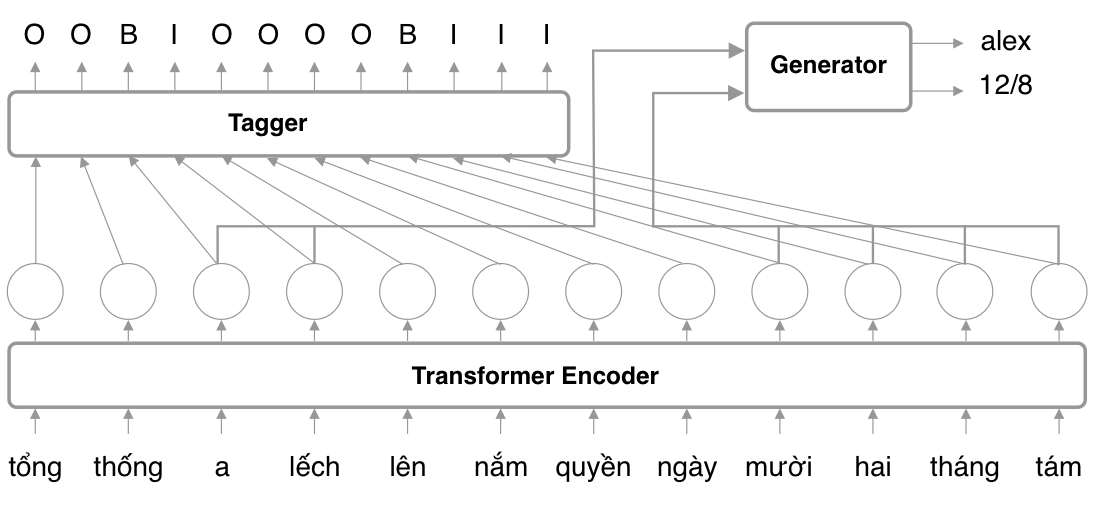

## Model evaluation

The _test_ set will be normalized using the trained model. [WER](https://huggingface.co/spaces/evaluate-metric/wer) metric will be use to evaluate this assignment.

In [ ]:
from datasets import load_metric

In [ ]:
wer = load_metric('wer')

### For example:

In [ ]:
wer.compute(predictions=['tổng thống a lếch lên nắm quyền ngày 13/8'],
            references=['tổng thống alex lên nắm quyền ngày 13/8'])

0.25

### Baseline WER result on the _valid_ set (do nothing model)

In [ ]:
predictions = [' '.join(item) for item in norm_data['valid']['src']]
references = [' '.join(item) for item in norm_data['valid']['tgt']]
wer.compute(predictions=predictions,
            references=references)

0.3577990422469617

## Load pretrain language model

In [ ]:
from transformers.file_utils import cached_path, hf_bucket_url
from importlib.machinery import SourceFileLoader
import os
from transformers import EncoderDecoderModel

cache_dir = './cache'
model_name = 'nguyenvulebinh/envibert'

if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)


def download_tokenizer_files():
    resources = ['envibert_tokenizer.py', 'dict.txt', 'sentencepiece.bpe.model']
    for item in resources:
        if not os.path.exists(os.path.join(cache_dir, item)):
            tmp_file = hf_bucket_url(model_name, filename=item)
            tmp_file = cached_path(tmp_file, cache_dir=cache_dir)
            os.rename(tmp_file, os.path.join(cache_dir, item))

def init_tokenizer():
    download_tokenizer_files()
    tokenizer = SourceFileLoader("envibert.tokenizer",
                                 os.path.join(cache_dir,
                                              'envibert_tokenizer.py')).load_module().RobertaTokenizer(cache_dir)
    return tokenizer

def init_model():
    download_tokenizer_files()
    tokenizer = SourceFileLoader("envibert.tokenizer",
                                 os.path.join(cache_dir,
                                              'envibert_tokenizer.py')).load_module().RobertaTokenizer(cache_dir)

    # set encoder decoder tying to True
    roberta_shared = EncoderDecoderModel.from_encoder_decoder_pretrained(model_name,
                                                                         model_name,
                                                                         tie_encoder_decoder=False)

    # set special tokens
    roberta_shared.config.decoder_start_token_id = tokenizer.bos_token_id
    roberta_shared.config.eos_token_id = tokenizer.eos_token_id
    roberta_shared.config.pad_token_id = tokenizer.pad_token_id

    # sensible parameters for beam search
    # set decoding params
    roberta_shared.config.max_length = 512
    roberta_shared.config.early_stopping = True
    roberta_shared.config.no_repeat_ngram_size = 3
    roberta_shared.config.length_penalty = 2.0
    roberta_shared.config.num_beams = 1
    roberta_shared.config.vocab_size = roberta_shared.config.encoder.vocab_size

    return roberta_shared, tokenizer

In [ ]:
model, tokenizer = init_model()
model

Some weights of the model checkpoint at nguyenvulebinh/envibert were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at nguyenvulebinh/envibert and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weigh

EncoderDecoderModel(
  (encoder): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(59993, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNo

In [ ]:
print(dataset['train'][1]["src"])

['đầu', 'mùa', 'giải', 'vừa', 'qua', 'bùi', 'tiến', 'dũng', 'chính', 'thức', 'khoác', 'màu', 'áo', 'của', 'câu lạc bộ', 'hà', 'nội', 'với', 'bản', 'hợp', 'đồng', 'kéo', 'dài', 'hai ngàn tám trăm linh một', 'mùa', 'giải', 'dù', 'trước', 'đó', 'anh', 'được', 'huấn luyện viên', 'park', 'hang', 'seo', 'sử', 'dụng', 'ở', 'cả', 'sáu mốt ngàn một trăm hai tám phẩy bảy chín tám tám', 'trận', 'đấu', 'của', 'chéo một nghìn xoẹt ba không không', 'việt', 'nam', 'trong', 'khuôn', 'khổ', 'vòng', 'loại', 'xuộc dê bê quờ gạch ngang ba năm không', 'châu', 'á', 'sáu mươi bốn phẩy không không bảy mươi tư', 'chủ', 'tịch', 'câu lạc bộ', 'hà', 'nội', 'ông', 'nguyễn', 'quốc', 'hội', 'cũng', 'không giờ sáu mươi', 'lên', 'tiếng', 'phủ', 'nhận', 'tin', 'đồn', 'tiến', 'dũng', 'sẽ', 'giải', 'nghệ', 'ông', 'cho', 'biết', 'tiến', 'dũng', 'vừa', 'cùng', 'đồng', 'đội', 'tham', 'dự', 'afc', 'cup', 'anh', 'vẫn', 'khỏe', 'mạnh', 'và', 'luyện', 'tập', 'bình', 'thường']


In [ ]:
# Tokenizing input and output sentences.
data = " ".join(dataset['train'][1]["src"])
print(data, tokenizer(data)["input_ids"])

đầu mùa giải vừa qua bùi tiến dũng chính thức khoác màu áo của câu lạc bộ hà nội với bản hợp đồng kéo dài hai ngàn tám trăm linh một mùa giải dù trước đó anh được huấn luyện viên park hang seo sử dụng ở cả sáu mốt ngàn một trăm hai tám phẩy bảy chín tám tám trận đấu của chéo một nghìn xoẹt ba không không việt nam trong khuôn khổ vòng loại xuộc dê bê quờ gạch ngang ba năm không châu á sáu mươi bốn phẩy không không bảy mươi tư chủ tịch câu lạc bộ hà nội ông nguyễn quốc hội cũng không giờ sáu mươi lên tiếng phủ nhận tin đồn tiến dũng sẽ giải nghệ ông cho biết tiến dũng vừa cùng đồng đội tham dự afc cup anh vẫn khỏe mạnh và luyện tập bình thường [0, 105, 1137, 279, 478, 204, 22298, 620, 8463, 136, 360, 6332, 686, 1102, 20, 886, 1734, 223, 5489, 613, 39, 321, 150, 122, 1297, 670, 296, 2942, 8528, 2340, 1925, 40, 1137, 279, 820, 229, 82, 252, 34, 3148, 1713, 198, 3832, 4173, 19008, 245, 144, 69, 206, 5739, 15158, 2942, 40, 2340, 296, 8528, 47275, 6617, 4521, 8528, 8528, 724, 593, 20, 11322, 

In [ ]:
from datasets import DatasetDict

def get_sample_from_dataset(dataset, train_size=10000):
    dataset_small = DatasetDict()
    dataset_small['valid'] = dataset['valid']
    dataset_small['test'] = dataset['test']
    dataset_small['train'] = dataset['train'].shuffle(seed=0).select(range(train_size))
    return dataset_small

dataset = get_sample_from_dataset(dataset, train_size=400000)

Loading cached shuffled indices for dataset at /home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-e174e4e6e92ec642.arrow


In [ ]:
new_dataset = dataset.map(lambda example: {"src": " ".join(example["src"])}, remove_columns=["src"])
print(new_dataset['train'][1]["src"], tokenizer(new_dataset['train'][1]["src"])["input_ids"])

Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-e84913bb0303ecb4.arrow
Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-7f318411eaf45af4.arrow
Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-30ba18cb8ab8b2d9.arrow


ronaldo tạo nên kỷ lục mà messi khó chạm tới ba bàn thắng vào lưới cagliari ở vòng bảy hai nghìn ba trăm bốn chín phẩy bẩy sáu bẩy bẩy serie a giúp ronaldo có được kỷ lục mới mà messi khó lòng đạt được cristiano ronaldo tỏa sáng rực rỡ giúp juventus khởi đầu năm mới hoành tráng bằng chiến thắng tám hai ba sáu không ba không chín năm hai bảy trên sân nhà trước cagliari bốn không không i gờ o ghi một triệu bàn và thực hiện đường kiến tạo cho higuain lập công ronaldo có được thêm hàng loạt kỷ lục sau cú hat-trick đầu tiên ở serie a ảnh getty màn trình diễn ấn tượng này giúp ronaldo thiết lập nhiều kỷ lục mới trong sự nghiệp siêu sao sinh mười chín giờ bốn trở thành cầu thủ thứ mười ba trên mười ba trong lịch sử lập hat-trick ở âm năm bẩy phẩy tám giải đấu premier league la liga serie a trước ronaldo chỉ có alexis sanchez làm được điều này ronaldo cũng đã có cú hat-trick thứ bẩy mươi chín phẩy không không một tới tám mươi sáu phẩy chín trong sự nghiệp thành tích không cầu thủ nào chạm đến 

In [ ]:
dataset = new_dataset.map(lambda example: {"tgt": " ".join(example["tgt"])}, remove_columns=["tgt"])
print(dataset['train'][1]["tgt"], tokenizer(dataset['train'][1]["tgt"])["input_ids"])

Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-00619be07eee2155.arrow
Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-bd367658ee651e20.arrow
Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/VietAI___parquet/VietAI--spoken_norm_assignment-ada0fdcdb6b08774/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-fe17b9fc490bc6ef.arrow


ronaldo tạo nên kỷ lục mà messi khó chạm tới ba bàn thắng vào lưới cagliari ở vòng 72.349,7677 serie a giúp ronaldo có được kỷ lục mới mà messi khó lòng đạt được cristiano ronaldo tỏa sáng rực rỡ giúp juventus khởi đầu năm mới hoành tráng bằng chiến thắng 82360309527 trên sân nhà trước cagliari 400igo ghi 1.000.000 bàn và thực hiện đường kiến tạo cho higuain lập công ronaldo có được thêm hàng loạt kỷ lục sau cú hat-trick đầu tiên ở serie a ảnh getty màn trình diễn ấn tượng này giúp ronaldo thiết lập nhiều kỷ lục mới trong sự nghiệp siêu sao sinh 19h4 trở thành cầu thủ thứ 13 / 13 trong lịch sử lập hat-trick ở -57,8 giải đấu premier league la liga serie a trước ronaldo chỉ có alexis sanchez làm được điều này ronaldo cũng đã có cú hat-trick thứ 79,001 - 86,9 trong sự nghiệp thành tích không cầu thủ nào chạm đến cựu sao real madrid còn ghi danh lịch sử với tư cách là cầu thủ đầu tiên ghi bàn trong 1 / 11 mùa liên tiếp 291 kg tính riêng trong top 356.453 giải đấu hàng đầu châu âu từ 19h đế

In [ ]:
print(dataset['valid'][2490]["src"])
print(dataset['valid'][2490]["tgt"])
# print(tokenizer(dataset['valid'][1]["tgt"]))

macbook pro âm tám am be trên mê ga bít tốt gỗ tốt cả nước sơn zing máy có vỏ nhôm sáng bóng đồng thời được tích hợp bộ vi xử lý core bờ hát a dét o ích ngang tốc độ cộng một bốn bốn sáu chín hai chín tám bốn bốn tám ghi ga héc của intel bộ nhớ ram ba trăm bẩy mươi tám ki lô mét vuông ổ cứng ba trăm linh tám ki lô mét và công nghệ chuyển đổi đồ họa tự động nvidia optimus so với model âm năm nghìn chín trăm lẻ bốn chấm một bốn mi li mét vuông trên mê ga oát sử dụng vi u bờ lờ ngang i xử lý core hai trăm hai bảy ngàn bẩy trăm bẩy bốn duo chiếc macbook pro hai trăm linh tám in mới được tân trang lại dường như đã trở nên chắc chắn và mạnh mẽ hơn cũng như những model macbook pro cũ bộ khung liền khối là lớp nhôm sáng bóng và khá chắc chắn macbook pro sở hữu touchpad rộng để thực hiện các thao tác đa chạm thực tế điều khiển cảm ứng thực sự thiết yếu đối với macbook pro so với iphone và ipad về những thao tác đa chạm việc di chuyển bằng sáu mươi ngàn sáu trăm hai mươi sáu ngón tay thực sự ấn 

## Data processing

In [ ]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq, PreTrainedTokenizerBase
from dataclasses import dataclass
from transformers.utils import PaddingStrategy
from typing import Optional, Union, Any
import numpy as np
from datasets import load_metric
import torch

In [ ]:
# The DataCollator is used for tokenization and padding to make batch input
@dataclass
class DataCollatorForInvertNormalization:
    tokenizer: PreTrainedTokenizerBase
    model: Optional[Any] = None
    padding: Union[bool, str, PaddingStrategy] = "max_length" # https://huggingface.co/docs/transformers/main_classes/tokenizer
    max_length: Optional[int] = 512
    pad_to_multiple_of: Optional[int] = None
    label_pad_token_id: int = -100
    return_tensors: str = "pt"

    def __call__(self, features, return_tensors=None):
        features_tokenized = []
        for feature in features:
          src = feature['input_ids']
          tgt = feature['labels']
          if len(src) == 0 or len(tgt) == 0:
              continue
          # features_tokenized.append({'input_ids': tokenizer(src)["input_ids"], 
          #                            'labels': tokenizer(tgt)["input_ids"][1:]})
          features_tokenized.append({'input_ids': tokenizer(src, truncation=True, max_length = self.max_length, padding = self.padding)["input_ids"], 
                                     'labels': tokenizer(tgt, truncation=True, max_length = self.max_length, padding = self.padding)["input_ids"][1:]})

        features = features_tokenized
        import numpy as np

        if return_tensors is None:
            return_tensors = self.return_tensors
        labels = [feature["labels"] for feature in features] if "labels" in features[0].keys() else None
        # We have to pad the labels before calling `tokenizer.pad` as this method won't pad them and needs them of the
        # same length to return tensors.
        if labels is not None:
            max_label_length = max(len(l) for l in labels)
            if self.pad_to_multiple_of is not None:
                max_label_length = (
                    (max_label_length + self.pad_to_multiple_of - 1)
                    // self.pad_to_multiple_of
                    * self.pad_to_multiple_of
                )

            padding_side = self.tokenizer.padding_side
            for feature in features:
                remainder = [self.label_pad_token_id] * (max_label_length - len(feature["labels"]))
                
                if isinstance(feature["labels"], list):
                    feature["labels"] = (
                        feature["labels"] + remainder if padding_side == "right" else remainder + feature["labels"]
                    )
                elif padding_side == "right":
                    feature["labels"] = np.concatenate([feature["labels"], remainder]).astype(np.int64)
                else:
                    feature["labels"] = np.concatenate([remainder, feature["labels"]]).astype(np.int64)
        
        features = self.tokenizer.pad(
            features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors=return_tensors,
        )

        # prepare decoder_input_ids
        if (
            labels is not None
            and self.model is not None
            and hasattr(self.model, "prepare_decoder_input_ids_from_labels")
        ):
            decoder_input_ids = self.model.prepare_decoder_input_ids_from_labels(labels=features["labels"])
            features["decoder_input_ids"] = decoder_input_ids

        return features

In [ ]:
dataset

DatasetDict({
    valid: Dataset({
        features: ['src', 'tgt'],
        num_rows: 2500
    })
    test: Dataset({
        features: ['src', 'tgt'],
        num_rows: 2500
    })
    train: Dataset({
        features: ['src', 'tgt'],
        num_rows: 200000
    })
})

In [ ]:
invert_norm_dataset = dataset.rename_column("src", "input_ids").rename_column("tgt", "labels")
print(invert_norm_dataset)
data_collator = DataCollatorForInvertNormalization(tokenizer, model)

DatasetDict({
    valid: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 2500
    })
    test: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 2500
    })
    train: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 200000
    })
})


In [ ]:
# Test data collator
data_collator([invert_norm_dataset['train'][item] for item in range(2)])

## Training

In [ ]:
# Define a function for evaluation
def get_metric_compute_fn(tokenizer):
    metric = load_metric("wer")

    def compute_metrics(eval_preds):
        preds, labels = eval_preds
        # In case the model returns more than the prediction logits
        if isinstance(preds, tuple):
            preds = preds[0]

        decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

        # Replace -100s in the labels as we can't decode them
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

        # Some simple post-processing
        decoded_preds = [pred.strip() for pred in decoded_preds]
        decoded_labels = [[label.strip()] for label in decoded_labels]

        result = metric.compute(predictions=decoded_preds, references=decoded_labels)
        return {"wer": result}

    return compute_metrics

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "True"

num_epochs = 10
checkpoint_path = "./checkpoints"
batch_size = 8
training_args = Seq2SeqTrainingArguments(
    output_dir=checkpoint_path,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    gradient_accumulation_steps=1,
    predict_with_generate=True,
    save_total_limit=2,
    do_train=True,
    do_eval=True,
    logging_steps=10,
    num_train_epochs = num_epochs,
    warmup_ratio=1 / num_epochs,
    logging_dir=os.path.join(checkpoint_path, 'log'),
    overwrite_output_dir=True,
    metric_for_best_model="wer",
    greater_is_better=True,
    eval_accumulation_steps=10,
    dataloader_num_workers=20,
)

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    compute_metrics=get_metric_compute_fn(tokenizer),
    train_dataset=invert_norm_dataset['train'], # .shard(200, 0),    # Only use subset of the dataset for a quick training. Remove shard for full training
    eval_dataset=invert_norm_dataset['valid'], # .shard(100, 0), # Only use subset of the dataset for a quick training. Remove shard for full training
    data_collator=data_collator,
    tokenizer=tokenizer
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
trainer.train()

## Decoding with beam

In [ ]:
device = "cuda:1"

In [ ]:
trained_model = model.from_pretrained('./checkpoints/checkpoint-225000')
trained_model.to(device)

EncoderDecoderModel(
  (encoder): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(59993, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNo

In [ ]:
dataset['test'][:3]["src"]

['đầu mùa giải vừa qua bùi tiến dũng chính thức khoác màu áo của câu lạc bộ hà nội với bản hợp đồng kéo dài năm triệu ba mươi mùa giải dù trước đó anh được huấn luyện viên park hang seo sử dụng ở cả sáu triệu hai trăm linh hai ngàn tám mươi ba trận đấu của bốn trăm bốn không không không ngang đê gi chéo dê việt nam trong khuôn khổ vòng loại rờ đê i sờ ngang ba nghìn hai mươi bốn trăm sáu mươi châu á chín mươi mốt chủ tịch câu lạc bộ hà nội ông nguyễn quốc hội cũng lên tiếng phủ nhận tin mười hai rưỡi đồn tiến dũng sẽ giải nghệ ông cho biết tiến dũng vừa cùng đồng đội tham dự afc cup anh vẫn khỏe mạnh và luyện tập bình thường',
 'tay vợt ba trăm mười một nghìn hai trăm mười ba lần vô địch wimbledon bị trộm chém petra kvitova đã bị tổn thương gân và dây thần kinh tay trái sau vụ bị tấn công bằng dao tại nhà riêng tay vợt nữ sẽ phải nghỉ thi đấu ít nhất tám triệu bốn trăm hai mươi nghìn hai trăm hai mươi hai tháng để điều trị chấn thương này petra kvitova là tay vợt từng hai nghìn bẩy tră

In [ ]:
sentence = dataset['test'][2334]["src"]

# encode context the generation is conditioned on
input_ids = tokenizer.encode(sentence, return_tensors='pt', truncation=True, max_length=512, padding="max_length").to("cuda:1")

# generate text until the output length (which includes the context length) reaches 512
beam_outputs = trained_model.generate(
    input_ids, 
    max_length=512, 
    num_beams=5,
    no_repeat_ngram_size=2, 
    num_return_sequences=1, 
    early_stopping=True
)
print("Input:\n", sentence)

print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  output_pieces = tokenizer.convert_ids_to_tokens(beam_output.cpu().numpy().tolist())
  output_text = tokenizer.sp_model.decode(output_pieces).replace("<pad>","")
  print("Prediction:\n{}".format(output_text))

Input:
 video lớp học khiêu vũ đặc biệt ở huế
Output:
----------------------------------------------------------------------------------------------------
Prediction:
video lớp học khiêu vũ đặc biệt ở huế


## Create output

In [ ]:
with open("output.txt", "w", encoding="utf-8") as f:
    for data in dataset["test"]:
        input_ids = tokenizer.encode(data["src"], return_tensors='pt', truncation=True, max_length=512, padding="max_length").to(device)
        beam_outputs = trained_model.generate(
            input_ids, 
            max_length=512, 
            num_beams=5,
            no_repeat_ngram_size=2, 
            num_return_sequences=1, 
            early_stopping=True
        )
        output_pieces = tokenizer.convert_ids_to_tokens(beam_outputs[0].numpy().tolist())
        output_text = tokenizer.sp_model.decode(output_pieces).replace("<pad>","")
        f.write(output_text)
        f.write("\n")